In [1]:
import numpy as np
import matplotlib.pyplot as plt
import argparse
import imutils
import cv2

In [2]:
def procesar_imagen(image_orig,th):
    image_contours = image_orig.copy()
    image_to_process = image_orig.copy()
    counter = 0
    __LOWER__ = 0
    lower = np.array([ __LOWER__, __LOWER__ , __LOWER__])
    upper = np.array([255, 255, 255])

    # find the colors within the specified boundaries
    image_mask = cv2.inRange(image_to_process, lower, upper)

    # apply the mask
    image_res = cv2.bitwise_and(image_to_process, image_to_process, mask = image_mask)

    ## load the image, convert it to grayscale, and blur it slightly
    image_gray = cv2.cvtColor(image_res, cv2.COLOR_BGR2GRAY)
    image_gray = vectorizar(image_gray,th)
    image_gray = cv2.GaussianBlur(image_gray, (5, 5), 0)

    # perform edge detection, then perform a dilation + erosion to close gaps in between object edges
    image_edged = cv2.Canny(image_gray, 100, 200)
    
    # find contours in the edge map
    cnts = cv2.findContours(image_edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if imutils.is_cv2() else cnts[1]

    # loop over the contours individually
    for c in cnts:
        # if the contour is not sufficiently large, ignore it
        if cv2.contourArea(c) < 1:
            continue
        # compute the Convex Hull of the contour
        hull = cv2.convexHull(c)
        cv2.drawContours(image_contours,[hull],0,(0,255,0),1)
        counter += 1
    return counter,image_contours

def vectorizar(img,x):
    th = x
    seed_pt = (25, 25)
    fill_color = 0
    image_to_process1 = cv2.threshold(img, th, 255, cv2.THRESH_BINARY)[1]
    image_to_process2 = cv2.floodFill(image_to_process1, None, seed_pt, fill_color)[1]
    image_res = image_to_process2
    return image_res

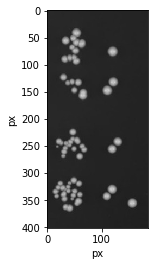

In [3]:
# Loads image to process
image= 'in.jpeg' # input image filename
output = 'out_'+ image # output image filename

image_orig = cv2.imread(image)
height_orig, width_orig = image_orig.shape[:2]

plt.imshow(image_orig)
plt.xlabel('px')
plt.ylabel('px')
plt.show()

54 colonies
159 loops


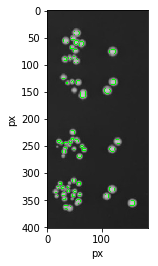

True

In [4]:
# output the image with an overlay of contours 
image_contours = image_orig.copy()
image_to_process = image_orig.copy()
 
c = 0; t = 0
for x in range(60,200):
    c_ant,im = procesar_imagen(image_orig,x)
    if c_ant > c:
        c = c_ant
        t = x
ll,image_contours = procesar_imagen(image_orig,t)
print(str(c)+" colonies")
print(str(t)+" loops")

plt.imshow(image_contours)
plt.xlabel('px')
plt.ylabel('px')
plt.show()

cv2.imwrite(output,image_contours) # Writes the output image file, returns 'True' if successful